In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,10

In [0]:
#Reading the data
data=pd.read_csv('/content/drive/My Drive/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [3]:
data.shape

(9735, 8)

In [4]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [0]:
#Dropping the columns Sno and Last Update
data.drop(['SNo','Last Update'],axis=1,inplace=True)

In [0]:
#Getting additonal Active cases for better implementation and information
data['Active']=data['Confirmed']-data['Deaths']-data['Recovered']

In [7]:
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0,1.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0,14.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0,6.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0,1.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0,0.0


In [8]:
#Checking for NA values
data.isna().sum()

ObservationDate       0
Province/State     4433
Country/Region        0
Confirmed             0
Deaths                0
Recovered             0
Active                0
dtype: int64

In [9]:
#Filling NA Values
data['Province/State']=data['Province/State'].fillna('Not Specified')
data.isna().sum()

ObservationDate    0
Province/State     0
Country/Region     0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64

In [10]:
data['Province/State'].value_counts()

Not Specified                   4433
Diamond Princess cruise ship      82
Hebei                             69
Gansu                             69
Xinjiang                          67
                                ... 
Anguilla                           1
Harrison County, KY                1
Johnson County, IA                 1
Lackland, TX                       1
Spartanburg County, SC             1
Name: Province/State, Length: 294, dtype: int64

In [11]:
data.dtypes

ObservationDate     object
Province/State      object
Country/Region      object
Confirmed          float64
Deaths             float64
Recovered          float64
Active             float64
dtype: object

In [0]:
data['Confirmed']=data['Confirmed'].astype(int)
data['Recovered']=data['Recovered'].astype(int)
data['Deaths']=data['Deaths'].astype(int)
data['Active']=data['Active'].astype(int)

In [13]:
data.dtypes

ObservationDate    object
Province/State     object
Country/Region     object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
dtype: object

In [14]:
china_cases=data[data['ObservationDate']==max(data['ObservationDate'])].reset_index(drop=True)
china_cases=china_cases.groupby('Country/Region')['Confirmed'].sum()['Mainland China']
china_cases

81401

In [15]:
data.dtypes

ObservationDate    object
Province/State     object
Country/Region     object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
dtype: object

In [16]:
#As the cases in China will not play a significant role in prediciting, we drop those rows.
#values with _nc are the values with notchina
data_nc=data[data['Country/Region']!='Mainland China']
data_nc

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
12,01/22/2020,Hong Kong,Hong Kong,0,0,0,0
20,01/22/2020,Macau,Macau,1,0,0,1
28,01/22/2020,Taiwan,Taiwan,1,0,0,1
31,01/22/2020,Washington,US,1,0,0,1
35,01/22/2020,Not Specified,Japan,2,0,0,2
...,...,...,...,...,...,...,...
9727,03/28/2020,West Virginia,US,96,0,0,96
9728,03/28/2020,Western Australia,Australia,278,2,28,248
9729,03/28/2020,Wisconsin,US,1055,17,0,1038
9730,03/28/2020,Wyoming,US,82,0,0,82


In [0]:
data_per_day=data.groupby('ObservationDate')[['Confirmed','Deaths','Recovered','Active']].sum()

In [0]:
data_per_day_nc=data_nc.groupby('ObservationDate')[['Confirmed','Deaths','Recovered','Active']].sum()

In [19]:
data_per_day_nc.tail()

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
03/24/2020,336786,15338,34536,286912
03/25/2020,386373,17900,40109,328364
03/26/2020,448293,20683,48089,379521
03/27/2020,511946,23906,56315,431725
03/28/2020,579305,27357,64437,487511


In [20]:
data_per_day_nc.describe()

,Confirmed,Deaths,Recovered,Active
count,67.000000,67.000000,67.000000,67.000000
mean,64377.671642,2755.402985,6598.328358,55023.940299
std,130201.062774,6029.466136,13788.374365,110435.415260
min,8.000000,0.000000,0.000000,8.000000
25%,330.000000,2.000000,17.000000,311.000000
50%,2418.000000,36.000000,237.000000,2145.000000
75%,46315.000000,1504.000000,5467.000000,39344.000000
max,579305.000000,27357.000000,64437.000000,487511.000000


In [21]:
data_per_day_nc.shape

(67, 4)

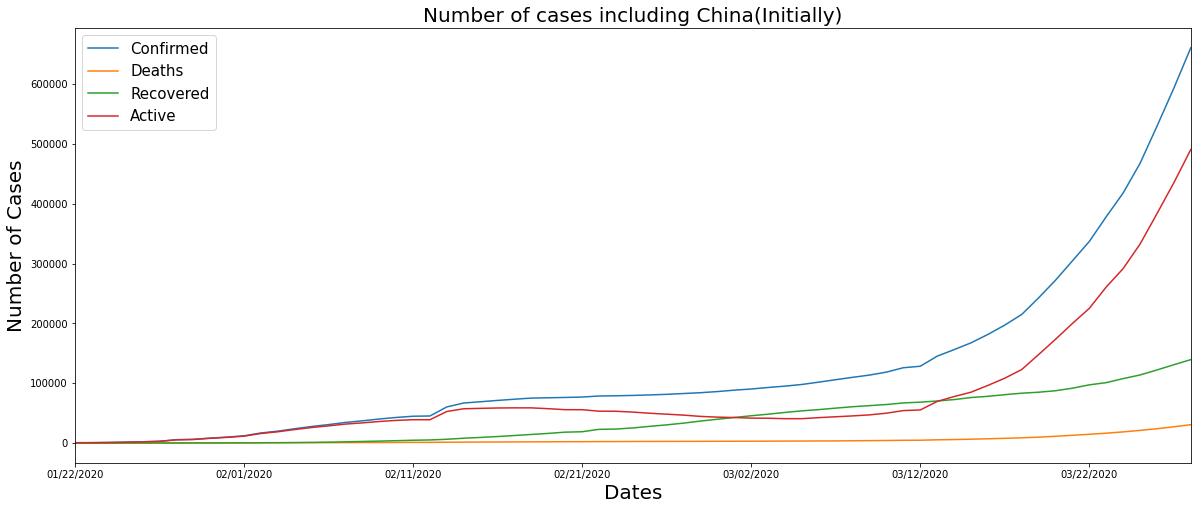

In [60]:
data_per_day.plot(kind='line',figsize=(20,8))
plt.ylabel('Number of Cases',size=20)
plt.xlabel('Dates',size=20)
plt.title('Number of cases including China(Initially)',size=20)
plt.legend(prop={'size':'15'})

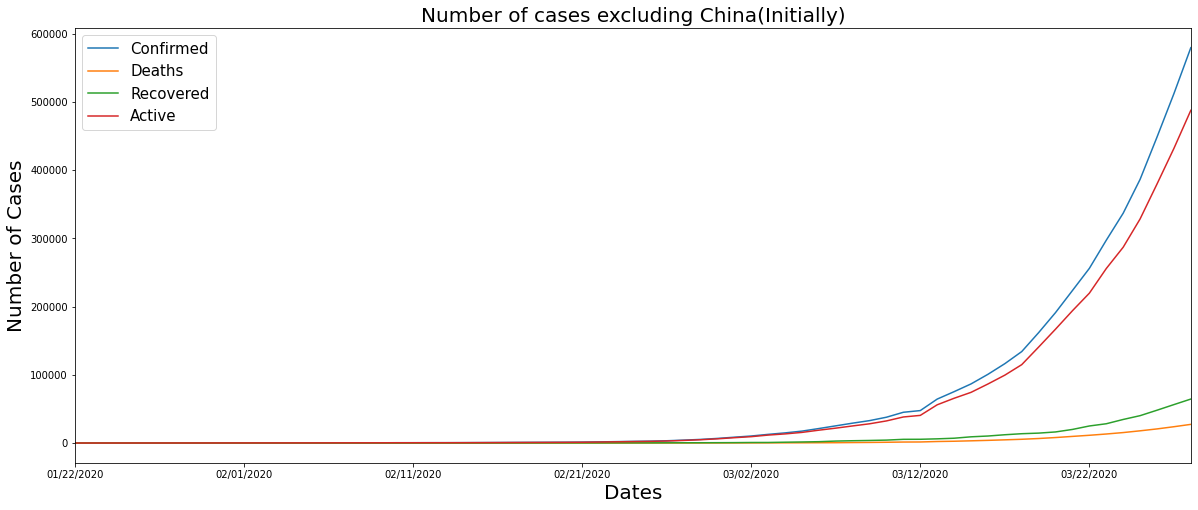

In [64]:
#Data for Countries except China
data_per_day_nc.plot(kind='line',figsize=(20,8))
plt.ylabel('Number of Cases',size=20)
plt.xlabel('Dates',size=20)
plt.title('Number of cases excluding China(Initially)',size=20)
plt.legend(prop={'size':'15'})

In [0]:
from fbprophet import Prophet

p=Prophet()

In [25]:
p.add_seasonality(name='monthly',period=30.5,fourier_order=5)

In [26]:
print(data_per_day.shape)

cases=data_per_day.reset_index()
cases.tail()

(67, 4)


,ObservationDate,Confirmed,Deaths,Recovered,Active
62,03/24/2020,417966,18615,107705,291646
63,03/25/2020,467594,21181,113770,332643
64,03/26/2020,529591,23970,122150,383471
65,03/27/2020,593291,27198,130915,435178
66,03/28/2020,660706,30652,139415,490639


In [0]:
cases_nc=data_per_day_nc.reset_index()

In [0]:
confirmed_cases=cases_nc[['ObservationDate','Confirmed']]
recovered_cases=cases_nc[['ObservationDate','Recovered']]
death_cases=cases_nc[['ObservationDate','Deaths']]
active_cases=cases_nc[['ObservationDate','Active']]

**ANALYSIS OF CONFIRMED CASES**


In [29]:
confirmed_cases.rename(columns={'ObservationDate':'ds','Confirmed':'y'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
confirmed_cases.tail()

,ds,y
62,03/24/2020,336786
63,03/25/2020,386373
64,03/26/2020,448293
65,03/27/2020,511946
66,03/28/2020,579305


In [31]:
#Fit Model
p.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
#Future Dates
future_dates=p.make_future_dataframe(periods=30)
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
92,2020-04-23
93,2020-04-24
94,2020-04-25
95,2020-04-26


In [0]:
#Prediction
prediction=p.predict(future_dates)

Text(0.5, 1.0, 'Predicted Number of Confirmed Cases')

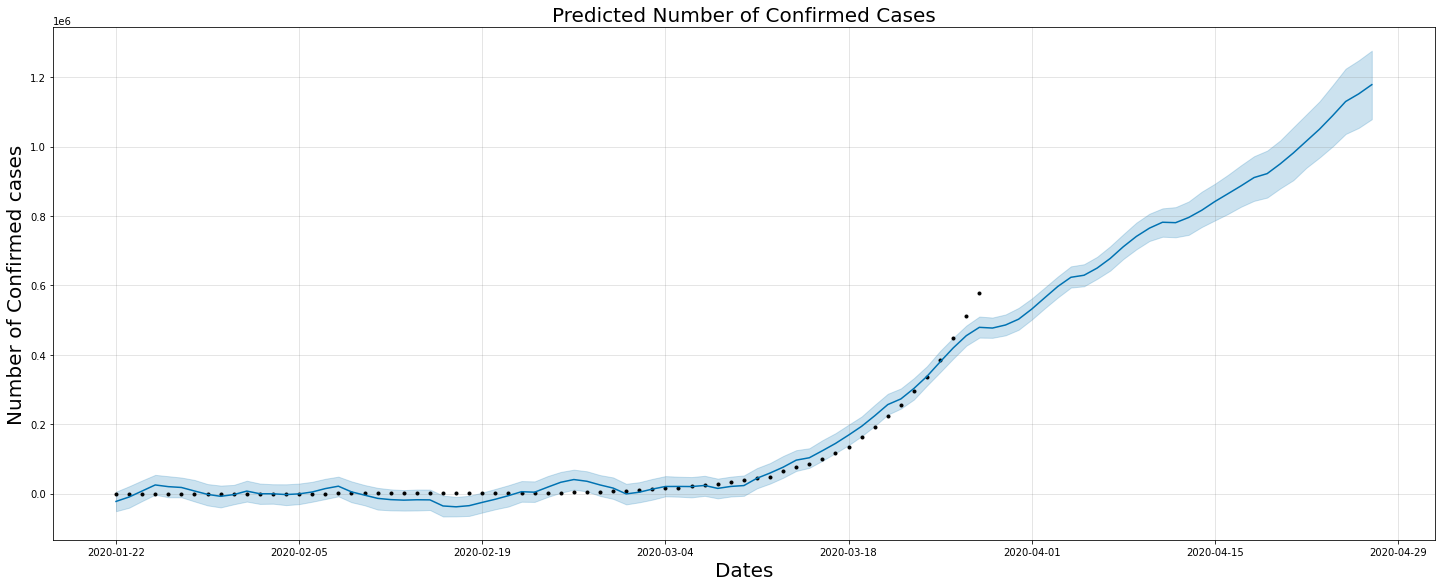

In [63]:
#Plot Prediction
p.plot(prediction,figsize=(20,8))
plt.xlabel('Dates',size=20)
plt.ylabel('Number of Confirmed cases',size=20)
plt.title('Predicted Number of Confirmed Cases',size=20)

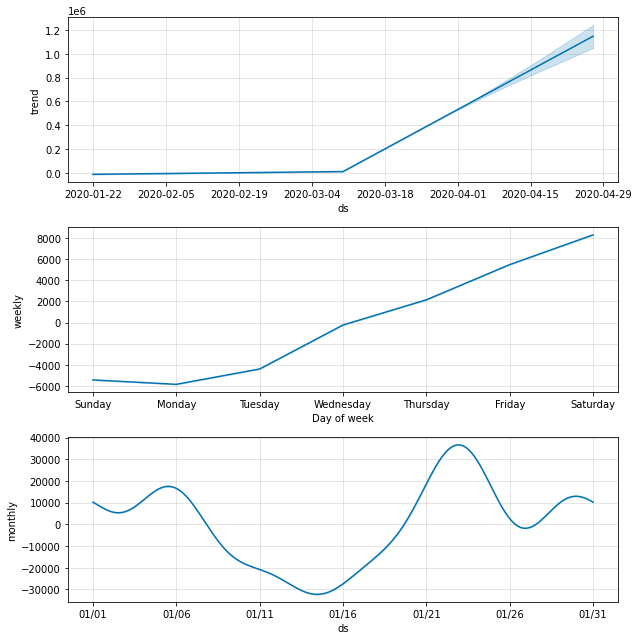

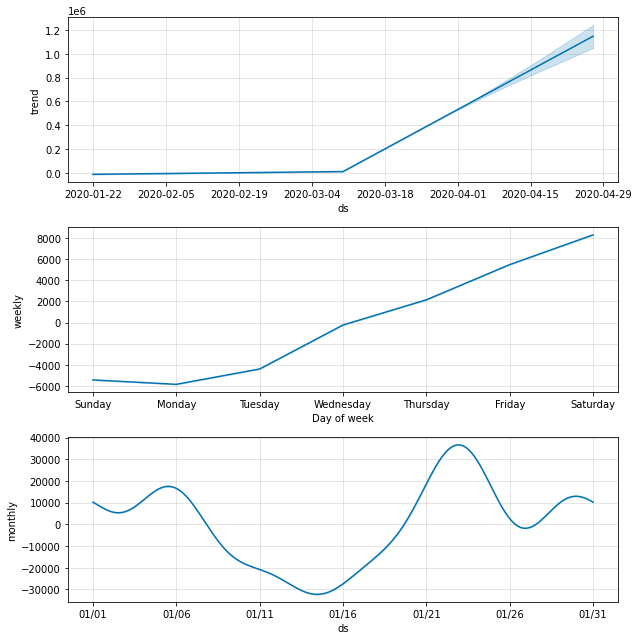

In [35]:
p.plot_components(prediction)

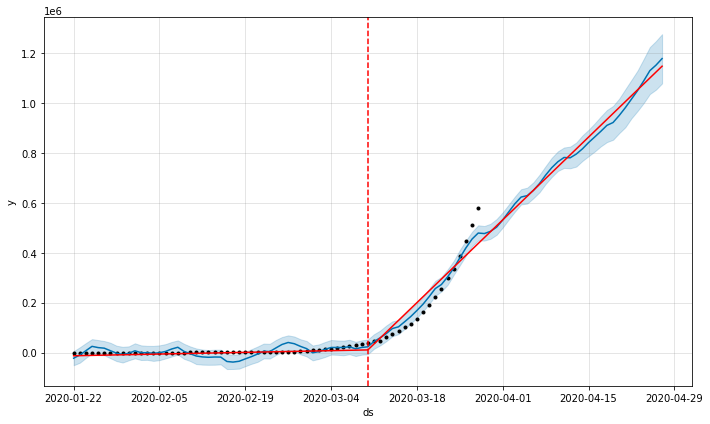

In [36]:
#Find Points/Dates for change
from fbprophet.plot import add_changepoints_to_plot
fig=p.plot(prediction)
c=add_changepoints_to_plot(fig.gca(),p,prediction)

In [37]:
prediction.tail().T

,92,93,94,95,96
ds,2020-04-23 00:00:00,2020-04-24 00:00:00,2020-04-25 00:00:00,2020-04-26 00:00:00,2020-04-27 00:00:00
trend,1.05328e+06,1.07697e+06,1.10067e+06,1.12437e+06,1.14806e+06
yhat_lower,968394,1.00038e+06,1.03646e+06,1.05401e+06,1.07897e+06
yhat_upper,1.13039e+06,1.17672e+06,1.22467e+06,1.24879e+06,1.27651e+06
trend_lower,972441,991535,1.01074e+06,1.0301e+06,1.04924e+06
trend_upper,1.12897e+06,1.15752e+06,1.18639e+06,1.21538e+06,1.244e+06
additive_terms,-3051.64,12090.1,29408.9,27747.4,30585.5
additive_terms_lower,-3051.64,12090.1,29408.9,27747.4,30585.5
additive_terms_upper,-3051.64,12090.1,29408.9,27747.4,30585.5
monthly,-5196.4,6618.52,21127,33174.8,36428.3


In [38]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
92,2020-04-23,1.050226e+06,9.683939e+05,1.130392e+06
93,2020-04-24,1.089064e+06,1.000384e+06,1.176724e+06
94,2020-04-25,1.130080e+06,1.036463e+06,1.224666e+06
95,2020-04-26,1.152115e+06,1.054007e+06,1.248792e+06
96,2020-04-27,1.178650e+06,1.078974e+06,1.276508e+06


In [39]:
print('Prediction of Confirmed cases for',prediction['ds'][95],'is ',round(prediction['yhat'][95]))

Prediction of Confirmed cases for 2020-04-26 00:00:00 is  1152115.0


In [40]:
k=len(prediction)
k

97

In [41]:
for i in range(68,k) :
  print('Prediction of Confirmed cases for',prediction['ds'][i],'is ',round(prediction['yhat'][i].astype(int))+china_cases)

Prediction of Confirmed cases for 2020-03-30 00:00:00 is  567370
Prediction of Confirmed cases for 2020-03-31 00:00:00 is  584111
Prediction of Confirmed cases for 2020-04-01 00:00:00 is  613051
Prediction of Confirmed cases for 2020-04-02 00:00:00 is  646002
Prediction of Confirmed cases for 2020-04-03 00:00:00 is  678545
Prediction of Confirmed cases for 2020-04-04 00:00:00 is  704868
Prediction of Confirmed cases for 2020-04-05 00:00:00 is  710708
Prediction of Confirmed cases for 2020-04-06 00:00:00 is  731359
Prediction of Confirmed cases for 2020-04-07 00:00:00 is  759042
Prediction of Confirmed cases for 2020-04-08 00:00:00 is  792828
Prediction of Confirmed cases for 2020-04-09 00:00:00 is  822569
Prediction of Confirmed cases for 2020-04-10 00:00:00 is  846468
Prediction of Confirmed cases for 2020-04-11 00:00:00 is  863482
Prediction of Confirmed cases for 2020-04-12 00:00:00 is  862245
Prediction of Confirmed cases for 2020-04-13 00:00:00 is  877218
Prediction of Confirmed c

In [42]:
print('Prediction of Confirmed cases for',prediction['ds'][65],'is ',round(prediction['yhat'][65].astype(int))+china_cases)

Prediction of Confirmed cases for 2020-03-27 00:00:00 is  536536


In [43]:
ab=prediction[prediction['ds']>=max(data['ObservationDate'])][['ds','yhat']].reset_index(drop=True)
ab.rename(columns={'ds':'date','yhat':'confirmed_val'},inplace=True)
ab

,date,confirmed_val
0,2020-03-28,4.792203e+05
1,2020-03-29,4.771427e+05
2,2020-03-30,4.859697e+05
3,2020-03-31,5.027110e+05
4,2020-04-01,5.316508e+05
5,2020-04-02,5.646014e+05
6,2020-04-03,5.971446e+05
7,2020-04-04,6.234679e+05
8,2020-04-05,6.293077e+05
9,2020-04-06,6.499583e+05


In [0]:
cd=pd.DataFrame(ab)
cd.to_csv('/content/drive/My Drive/Colab Notebooks/Confirmed Data.csv',index=False)